# Importing Libraries

In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



# Importing data

In [85]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [86]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
print("Shape of training data",train_data.shape)
print("Shape of test data",test_data.shape)

Shape of training data (1460, 81)
Shape of test data (1459, 80)


In [88]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Preprocessing
### Checking Duplicates

In [89]:
print(train_data['Id'].nunique() == train_data['Id'].count())
print(test_data['Id'].nunique() == test_data['Id'].count())

True
True


###### It shows that there are no duplicate IDs in both training and test dataset

### Missing data

In [90]:
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.shape[0]).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [91]:
(missing_data[missing_data['Total'] > 1]).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [92]:
#dealing with missing data
train_data = train_data.drop((missing_data[missing_data['Total'] >= 1]).index,1)
train_data.isnull().sum().max()

0

### Handling Outliers

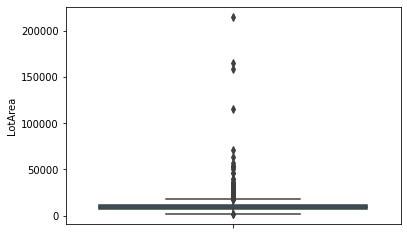

In [93]:
ax = sns.boxplot(y = 'LotArea', data = train_data)

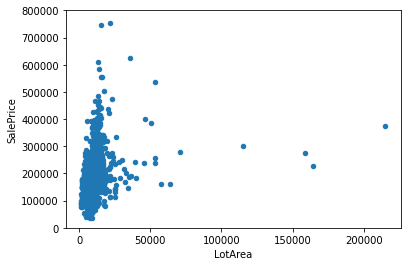

In [94]:
#bivariate analysis saleprice/LotArea
var = 'LotArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [95]:
x = 3
upper_lim = train_data['LotArea'].mean () + train_data['LotArea'].std () * x
lower_lim = train_data['LotArea'].mean () - train_data['LotArea'].std () * x
print(upper_lim)
outliers = train_data[train_data['LotArea'] > upper_lim]['LotArea']
print(outliers)

40460.62287932922
53       50271
249     159000
313     215245
335     164660
384      53107
451      70761
457      53227
661      46589
706     115149
769      53504
848      45600
1298     63887
1396     57200
Name: LotArea, dtype: int64


In [96]:
#Dropping the outlier rows with Percentiles
upper_lim = train_data['LotArea'].quantile(.95)
lower_lim = train_data['LotArea'].quantile(.05)

print(upper_lim)

outliers = train_data[train_data['LotArea'] > upper_lim]['LotArea']
print(outliers)

17401.15
53      50271
66      19900
113     21000
120     21453
159     19378
        ...  
1396    57200
1409    20544
1423    19690
1430    21930
1446    26142
Name: LotArea, Length: 73, dtype: int64


### Exploring target variable

In [97]:
SalePrice = train_data['SalePrice']
SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

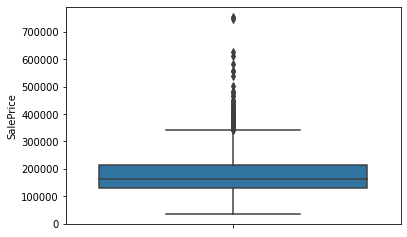

In [98]:
ax = sns.boxplot(y = 'SalePrice', data = train_data)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

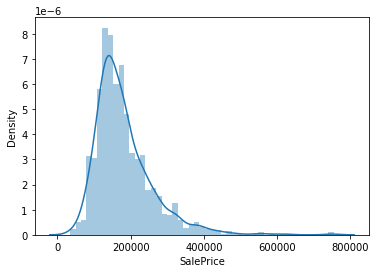

In [99]:
sns.distplot(SalePrice)

In [100]:
tranf_SalePrice = np.log(SalePrice)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tranfromation SalePrice', ylabel='Density'>

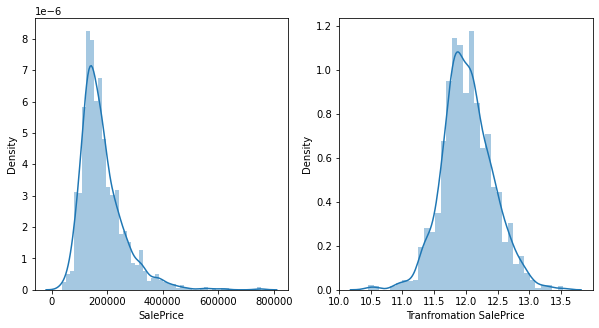

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(SalePrice, ax=ax[0])
sns.distplot(tranf_SalePrice, ax=ax[1], axlabel = 'Tranfromation SalePrice')

### Handling dummy categorical variables

In [102]:
train_data = pd.get_dummies(train_data)
train_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


## Feature Selection

The purposes of selecting features optimizing to get high performance of models and remove irrelevant features. It is also help reduce dimensions.

In [103]:
#split data
columns = list(train_data.columns)
columns.remove('Id')
columns.remove('SalePrice')

In [104]:
X = train_data[columns]
y = train_data['SalePrice']

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### Linear Regression (Ordinary least squares)

In [105]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
#Prediction
y_pred = lr.predict(X_test)

### Evaluate Linear Regression

In [107]:
# R square
R2 = lr.score(X_test, y_test)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(R2))

Training set score: 0.92
Test set score: 0.86


In [108]:
# Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Root Mean Squared Error: 27350.93


In [109]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  17847.56258196013


In [110]:
E1 = ['Linear Regression', R2, rmse, mae ]

### Ridge Regression

In [111]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

Training set score: 0.91
Test set score: 0.86
Number of features used: 210


In [112]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge10.coef_ != 0)))

Training set score: 0.89
Test set score: 0.87
Number of features used: 210


In [113]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge01.coef_ != 0)))

Training set score: 0.92
Test set score: 0.86
Number of features used: 210


In [114]:
#Prediction
y_pred = ridge.predict(X_test)

### Evaluate Ridge Regression

In [115]:
# R square
R2 = ridge.score(X_test, y_test)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(R2))

Training set score: 0.91
Test set score: 0.86


In [116]:
# Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Root Mean Squared Error: 26677.08


In [117]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  17871.181111560865


In [118]:
E2 = ['Ridge Regression', R2, rmse, mae ]

### Lasso Regression

In [119]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.92
Test set score: 0.87
Number of features used: 191


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267847770156.98108, tolerance: 769913181.1376123
  positive)


In [120]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.92
Test set score: 0.87
Number of features used: 198


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9338420732.424194, tolerance: 769913181.1376123
  positive)


In [121]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.92
Test set score: 0.87
Number of features used: 206


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97275988324.95395, tolerance: 769913181.1376123
  positive)


In [122]:
# Prediction
y_pred = lasso.predict(X_test)

### Evaluate Lasso Regression

In [123]:
# R square
R2 = lasso.score(X_test, y_test)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.87


In [124]:
# Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Root Mean Squared Error: 25920.89


In [125]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  17408.571208247096


In [126]:
E3 = ['Lasso Regression', R2, rmse, mae ]

# Evaluate Models

In [127]:
df = pd.DataFrame([E1, E2, E3],
               columns =['Model', 'R Square', 'RMSE', 'MAE'])
df

,Model,R Square,RMSE,MAE
0,Linear Regression,0.855099,27350.930329,17847.562582
1,Ridge Regression,0.862151,26677.081819,17871.181112
2,Lasso Regression,0.869855,25920.894237,17408.571208
